In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
from scipy import stats
tips_all = sns.load_dataset("tips")


In [4]:
#tips_all

In [5]:
tips_grouped = tips_all.groupby(["smoker", "size"])
tips = tips_grouped.mean()
tips

total_bill       tip
smoker size                      
Yes    1       5.825000  1.460000
       2      17.955758  2.709545
       3      28.191667  4.095000
       4      30.609091  3.992727
       5      29.305000  2.500000
       6            NaN       NaN
No     1       8.660000  1.415000
       2      15.342333  2.489000
       3      21.009615  3.069231
       4      27.769231  4.195769
       5      30.576667  5.046667
       6      34.830000  5.225000

In [6]:
table1 = pd.pivot_table(tips_all, values=['total_bill','tip'], index=['smoker', 'size'])
                    #aggfunc={'Var':max})

In [7]:
table1.reset_index(inplace=True)

In [8]:
table1

,smoker,size,tip,total_bill
0,Yes,1,1.460000,5.825000
1,Yes,2,2.709545,17.955758
2,Yes,3,4.095000,28.191667
3,Yes,4,3.992727,30.609091
4,Yes,5,2.500000,29.305000
5,Yes,6,NaN,NaN
6,No,1,1.415000,8.660000
7,No,2,2.489000,15.342333
8,No,3,3.069231,21.009615
9,No,4,4.195769,27.769231


In [9]:
tips["CI"] = tips_grouped.total_bill.apply(stats.sem) * 1.96
tips.reset_index(inplace=True)

/Users/Mila/anaconda/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


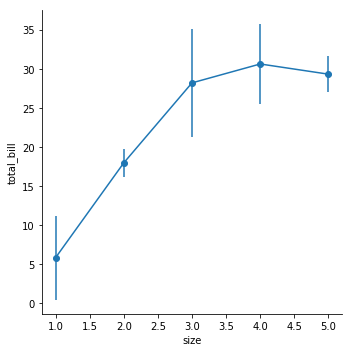

In [13]:
g = sns.FacetGrid(tips[tips['smoker']=='Yes'], size=5)
g.map(plt.errorbar, "size", "total_bill", "CI", marker="o")

/Users/Mila/anaconda/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


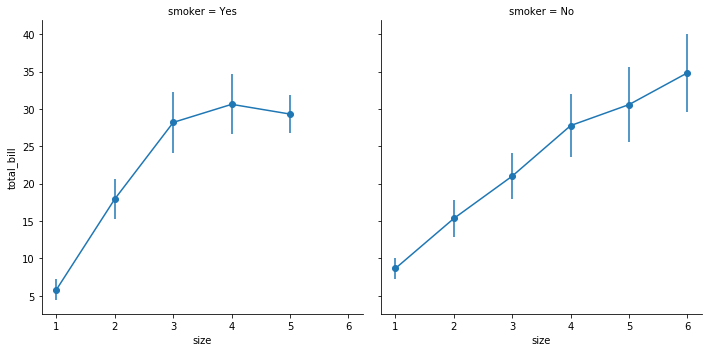

In [11]:
g = sns.FacetGrid(table1, col="smoker", size=5)
g.map(plt.errorbar, "size", "total_bill", "tip", marker="o")